# Instance-Based Learning: K-Nearest Neighbours(kNN)

## 1. Data Preprocessing

Importing the library needed

In [77]:
#importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the test an train datasets

In [78]:
train = pd.read_csv('data/data_train.csv')
test = pd.read_csv('data/data_test.csv')

### Data transformation of the categorical attrbutes to numeric.

The categorical column that needed to be transform are the workclass, education, marital-status, relationship, race, gender and native-country

In [79]:
#transformation 
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_train
le = LabelEncoder()
for col in cat_columns:
    train[col] = le.fit_transform(train[col])

# Encode categorical columns using Label Encoding for data_test
le = LabelEncoder()
for col in cat_columns:
    test[col] = le.fit_transform(test[col])


# Print the first 5 rows of the transformed dataset
#print(train.head())
#print(test.head())

Now we drop our targeted column of income of our train and test datasets

In [80]:

#train
x_train_trans = train.drop(columns = ['income'])
y_train = train['income']

#test
x_test_trans = test.drop(columns =['income'])
y_test = test['income']

#print(x_train_trans)
#print(y_train_trans)
#print(x_test_trans)


### Standard Scaling


StandardScaler is being used to standardize the data by removing the mean and scaling to unit variance. This is to ensure that all features are on the same scale, which can improve the performance and accuracy of algorithm. The mathematical expression use for this standard scaling is:

x_scaled = (x - mean) / std

where x is the original feature value, mean is the mean of the feature values, std is the standard deviation of the feature values, and x_scaled is the scaled feature value.

In [81]:
#Standard Scaling

from sklearn import preprocessing

x_train = preprocessing.StandardScaler().fit(x_train_trans).transform(x_train_trans.astype(float))
#print(x_train)

x_test = preprocessing.StandardScaler().fit(x_test_trans).transform(x_test_trans.astype(float))
#print(x_test)


## 2. Using default kNN

The model is first train with a default hyperparameter

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


#base model
default_knn = KNeighborsClassifier()
default_knn.fit(x_train, y_train)


KNeighborsClassifier()

Now we find the hyperparameter use in the default kNN

In [83]:
#finding the default hyperparameter
n_neighbors = default_knn.n_neighbors
weights = default_knn.weights
metric = default_knn.metric
leaf_size = default_knn.leaf_size
algorithm = default_knn.algorithm
p = default_knn.p
n_jobs = default_knn.n_jobs

print('The hyperparameter for the default kNN is: \n n_neighbors:', n_neighbors, ', weights: ', weights, ', distance metric: ',metric, ', leaf_size: ',leaf_size, ', algorithm: ',algorithm, ', p: ',p, ', n_jobs: ',n_jobs)


The hyperparameter for the default kNN is: 
 n_neighbors: 5 , weights:  uniform , distance metric:  minkowski , leaf_size:  30 , algorithm:  auto , p:  2 , n_jobs:  None


The performance and the confusion matrix report are produce to analyze the performance of the default model

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12435
           1       0.65      0.57      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281

ROC_AUC score:  0.7405577019220697


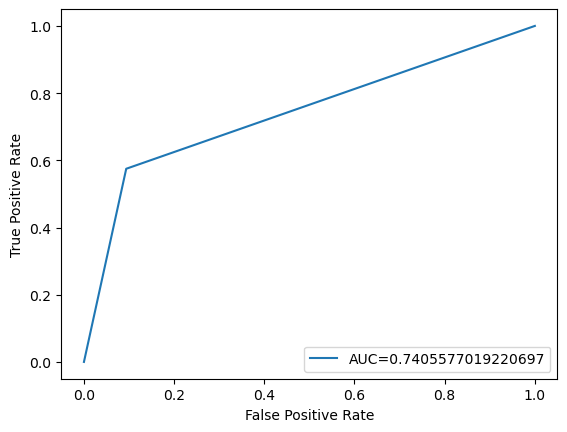

Confusion Matrix: 
 [[11269  1166]
 [ 1635  2211]]


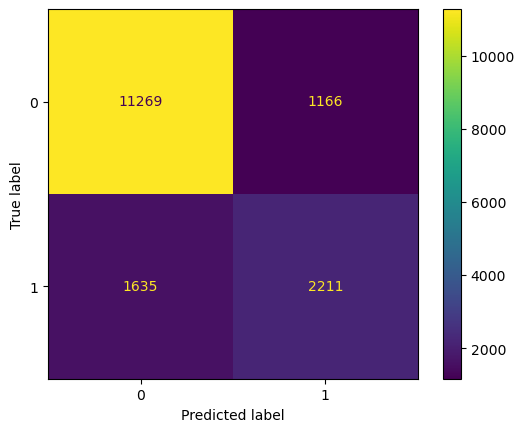

In [84]:

#predict
y_pred=default_knn.predict(x_test)


#Summarize Result
#precision,recall,f1-score,support, accuracy, macro avg, weighted avg
print(classification_report(y_test,y_pred))

#ROC score
auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC score: ', auc)

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test,y_pred,))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


The report provides evaluation metrics such as precision, recall, F1-score, accuracy and ROC_AUC score. The precision and recall for class 1: ‘income’ >50k are 0.65 and 0.57 respectively. These means the algorithm identifies 65% and 57% of the predicted positive samples are actually true positives. 

F1-score is a harmonic mean of precision and recall, and it provides a balanced measure of both metrics. In this case, the F1-score for class 1 is 0.61, which indicates moderate performance.

In the Confusion Matrix, 11269 are the number of correctly predicted positive instances and the 2211 is the number of correctly predicted negative instances. With the components of the confusion matrix, we can get the accuracy of the model. It uses equation as follows:

    Accuracy = (TP + TN) / (TP + TN + FP + FN)

    Accuracy = (11269 + 2211) / (11269 + 1166 + 1635 + 2211)

    Accuracy = 82.6%

Accuracy refers to the proportion of correct predictions among all the samples. In this case, the overall accuracy is 0.83, which means that the algorithm correctly predicted 83% of the samples.

The ROC-AUC score is a measure of the algorithm's ability to distinguish between the positive and negative samples, and it ranges from 0 to 1, with higher values indicating better performance. In this case, the ROC-AUC score is 0.74, which indicates that the algorithm's ability to discriminate between positive and negative samples is moderate.

Overall, the algorithm shows reasonable performance but could potentially be improved, especially in terms of recall and ROC-AUC score.


## 3. Hyperparameter Tuning

### 3.1 Method: K-folds Cross Validation
In order to improve the performance of the model and minimizing overfitting, it is crucial to tune the hyperparameter for achieving an optimal model. The method use for the hyperparameter tuning is K-folds Cross-Validation.

This is done by splitting the datasets into k equal parts. Use k-1 parts for training the algorithm and the remaining part for testing. Repeat this process k times, so that each part is used for testing once. This method can provide a more robust estimate of the performance of the algorithm.

The advantage of doing a K-folds Cross-Validation that it minimizes the variance of the assessment scores when compared to a single train-test split and enables us to use all the available data for both training and testing. The variance in performance across the k different splits can also be used to measure the stability of your model.



### 3.2 GridSearchCV and determining the predefined range of the hyperparameter
The ‘GridSearchCV’ function in Sklearn library is use to conducts an exhaustive search over a predefined parameter grid to identify the ideal parameters for a chosen estimator. The predefined range for the grid of the parameter is as follows:

- n_neighbor: range from 1 up to but not including 60, incrementing by 5 at each step
- weights: uniform and distance
- distance metric: euclidean, manhattan and minkowski
- algorithm: auto, ball_tree and kd_tree
- leaf_size: range from 10 to up to but not including 50, incrementing by 5 at each step

When creating the parameter grid, the range of values for each parameter is consider and predefined. The general guidelines are adopted which are:

- Looking at the default hyperparameter of the experimental default kNN giving us the rough idea where to start the range value.
- If the parameter is categorical, all possible values are specify. Meanwhile, if the parameter is continuous, a reasonable range of values is decided by starting with a wide range and then narrow it down based on the results
- Trying different range and see how they affect the performance of the model
- Considering the problem of the data and domain knowledge



### 3.3 How the hyperparameter tuning is implement - the strategy
The strategy on running the search grid is to do it in multiple iteration and fix the previous obtain hyperparameter when doing the next iteration

#### 3.3.1 First Iteration
In the first iteration, the code tries out different values of n_neighbors ranging from 1 to 60 with a step of 5. The other hyperparameters are left at their default values.

In [85]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

#first iteration:
# Creating a parameter of the grid
param_grid = [{
    'n_neighbors': list(range(1, 60, 5)),
    #'weights':['uniform','distance'],
    #'metric': ['euclidean', 'manhattan','minkowski'],
    #'algorithm':['auto','ball_tree','kd_tree'],
    #'leaf_size': list(range(10,60,5))
}]

# Grid search model
knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn_grid, param_grid = param_grid, cv =5, scoring = 'roc_auc')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                          51, 56]}],
             scoring='roc_auc')

In [86]:
#Finding the hyperparameter 
print("The list of hyperparmeter: ", grid_search.best_params_)

The list of hyperparmeter:  {'n_neighbors': 31}


#### 3.3.2 Second Iteration
In the second iteration, the code fixes the value of n_neighbors to the best value found in the first iteration (31) and tries out different values of weights and metric. The other hyperparameters are left at their default values.

In [87]:
#second iteration:
# Creating a parameter of the grid
param_grid = [{
    'n_neighbors': [31],
    'weights':['uniform','distance'],
    'metric': ['euclidean', 'manhattan','minkowski'],
    #'algorithm':['auto','ball_tree','kd_tree'],
    #'leaf_size': list(range(10,60,5))
}]

# Grid search model
knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn_grid, param_grid = param_grid, cv =5, scoring = 'roc_auc')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'minkowski'],
                          'n_neighbors': [31],
                          'weights': ['uniform', 'distance']}],
             scoring='roc_auc')

In [88]:
#Finding the hyperparameter 
print("The list of hyperparmeter: ", grid_search.best_params_)

The list of hyperparmeter:  {'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}


#### 3.3.3 Third Iteration
In the third iteration, the code fixes the values of n_neighbors: 31, weights: uniform, and metric: manhattan, to the best values found in the previous iterations and tries out different values of algorithm and leaf_size.

In [89]:
#third iteration:
# Creating a parameter of the grid
param_grid = [{
    'n_neighbors': [31],
    'weights':['uniform'],
    'metric': ['manhattan'],
    'algorithm':['auto','ball_tree','kd_tree'],
    'leaf_size': list(range(10,60,5))
}]

# Grid search model
knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn_grid, param_grid = param_grid, cv =5, scoring = 'roc_auc')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                          'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
                          'metric': ['manhattan'], 'n_neighbors': [31],
                          'weights': ['uniform']}],
             scoring='roc_auc')

### 3.4 Finding the best scorer and optimal hyperparameters

We now want to find the best score and hyperparameters that resulted in the best score

In [91]:
#Best score
print('Best scorer: ', grid_search.best_score_)

#Finding the hyperparameter to achieve this score
print("The list of hyperparmeter in order to achieve this best score: ", grid_search.best_params_)

Best scorer:  0.8896552947557987
The list of hyperparmeter in order to achieve this best score:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}


## 4. Model with the best Hyperparameter

With the tuned hyperparameter we have, we made a best model with these hyperparameter

In [92]:
#will inserting the cest hyperparameters that been found when grid search is done
best_model = KNeighborsClassifier(n_neighbors=31, weights='uniform', leaf_size= 10, metric='manhattan', algorithm='auto')

Fit the best model and then uses the trained model to make prediction on the test data (x_test) and stores the predicted labels in the y_pred

In [93]:
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)

## 5. Performance and Confusion Matrix of the Best Model

The performance and confusion matrix for the best model with the tuned hyperparameter

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281

ROC_AUC score:  0.7467098177292592


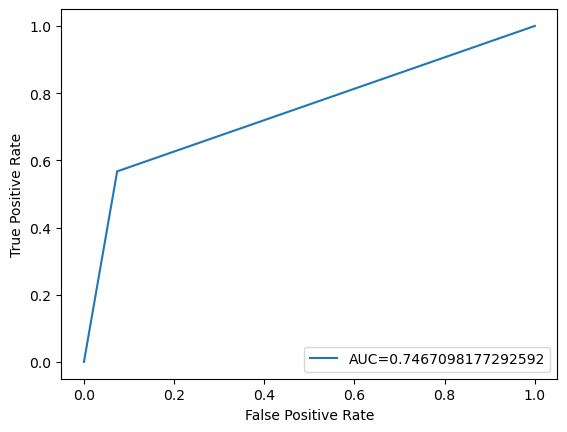

Confusion Matrix: 
 [[11519   916]
 [ 1665  2181]]


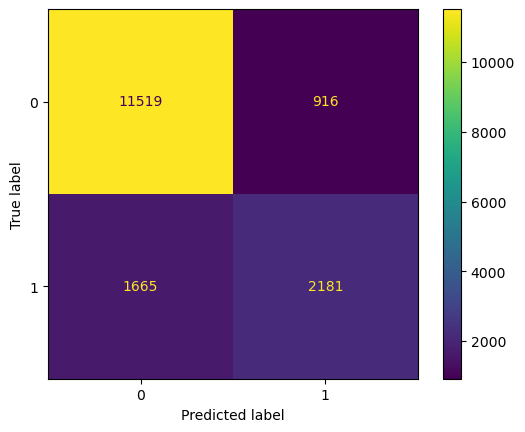

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}


In [94]:
#Summarize Result
#precision,recall,f1-score,support, accuracy, macro avg, weighted avg
print(classification_report(y_test,y_pred))

#ROC score
auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC score: ', auc)
#plotting roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test,y_pred,))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#Print the best hyperparameter tuned for the best model again
print(grid_search.best_params_)

The report provides evaluation metrics such as precision, recall, F1-score, accuracy and ROC_AUC score. The precision and recall for class 1: ‘income’ >50k are 0.70 and 0.57 respectively. These means the algorithm identifies 70% and 57% of the predicted positive samples are actually true positives. F1-score is the weighted average of the precision and recall .In this case, the F1-score for class 1 is 0.63, which indicates moderate performance.

In the Confusion Matrix, 11519 are the number of correctly predicted positive instances and the 2181 is the number of correctly predicted negative instances. With the components of the confusion matrix, we can get the accuracy of the model.

The overall accuracy of the model is 0.84, which means that the model predicted the correct class for 84% of all samples. Finally, the ROC-AUC score is 0.7467, which is a measure of how well the model can distinguish between the two classes. The higher the AUC (Area Under the Curve), the better the model's performance at distinguishing between the two classes.

Overall, the hyperparameter tuning for the best model performance result increase slightly from the experimental default kNN of ROC-AUC score from 0.7406 to 0.7467. 


In [99]:
import time
#Calculate the run time: import time

# Measure the runtime for predictions
start_time = time.time()
y_pred = best_model.predict(x_test)
y_pred = np.round(y_pred).astype(int)
end_time = time.time()

runtime = end_time - start_time
print(f"Model prediction runtime: {runtime:.4f} seconds")

Model prediction runtime: 19.9808 seconds


## 6. Exporting the model

In [98]:
import joblib
joblib.dump(best_model, 'output/knn/kNN.pkl')

['output/knn/kNN.pkl']